In [1]:
import tensorflow as tf


In [2]:
import os
 

In [3]:
data='data'
classes=['Blight','Common_Rust','Gray_Leaf_Spot','Healthy']

for c_name in classes:
    folder =os.path.join(data,c_name)
    for f_name in os.listdir(folder):
        file =os.path.join(folder,f_name)
        try:
            n_file =tf.io.read_file(file)
            tf.io.decode_image(n_file)
        except Exception as e:
            os.remove(file)
            


In [4]:
train_ds =tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=30,
    validation_split=0.2,
    subset='training',
    image_size=(160,160),
    seed=1234
)
va_data =tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=30,
    validation_split=0.2,
    subset='validation',
    image_size=(160,160),
    seed=1234
)


Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [5]:
auto_tune =tf.data.AUTOTUNE
train_ds =train_ds.cache().prefetch(buffer_size=auto_tune)
va_data =va_data.cache().prefetch(buffer_size=auto_tune)

In [6]:
img_shape=(160,160,3)
base_model =tf.keras.applications.MobileNetV2(
    input_shape=img_shape,
    include_top =False,
    weights ='imagenet'
)

In [59]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [60]:
base_model.trainable =False

In [ ]:
base_model.fit

In [37]:
data_augmentation=tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=0.2,width_factor=0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

In [ ]:
model_att =tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(160,160,3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./127.5,offset=-1),
    base_model,
    # # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4,activation='softmax')

])
model_att.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_att.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_9 (Rescaling)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [39]:
model_att.fit(
    train_ds,
    epochs=50,
    validation_data=va_data,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',restore_best_weights=True,mode='max',patience=5),
        tf.keras.callbacks.ModelCheckpoint('maize_model.keras',monitor='val_loss',save_best_only=True,mode='min',verbose=1),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='va_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-7,
            mode='min'
        )
    ]
    

)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7300 - loss: 2.6457
Epoch 1: val_loss improved from inf to 1.25300, saving model to maize_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 73s 583ms/step - accuracy: 0.7309 - loss: 2.6403 - val_accuracy: 0.9116 - val_loss: 1.2530 - learning_rate: 0.0010
Epoch 2/50


c:\Users\Kelvi\Downloads\kelvin.py\CNN\.venv\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `va_loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.8791 - loss: 1.1778
Epoch 2: val_loss improved from 1.25300 to 0.76637, saving model to maize_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 51s 457ms/step - accuracy: 0.8792 - loss: 1.1766 - val_accuracy: 0.9068 - val_loss: 0.7664 - learning_rate: 0.0010
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.8995 - loss: 0.7443
Epoch 3: val_loss improved from 0.76637 to 0.55257, saving model to maize_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 51s 452ms/step - accuracy: 0.8994 - loss: 0.7439 - val_accuracy: 0.9068 - val_loss: 0.5526 - learning_rate: 0.0010
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9027 - loss: 0.5716
Epoch 4: val_loss improved from 0.55257 to 0.44281, saving model to maize_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 48s 429ms/step - accuracy: 0.9027 - loss: 0.5713 - val_accuracy: 0.9164 - val_loss: 0.4428 - learning_rate: 0.0010
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - a

In [41]:
loss,accuracy=model_att.evaluate(va_data)

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 402ms/step - accuracy: 0.9086 - loss: 0.3434


In [14]:
new_model=tf.keras.models.load_model("best_models.keras")

In [15]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 179, 179, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 88, 88, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │    12,390,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,212,821 (141.96 MB)

 Trainable params: 12,404,273 (47.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,808,548 (94.64 MB)

In [17]:
new_model.get_weights()

[array([[[[-0.16175881, -0.1119505 , -0.1724274 ,  0.25711778,
            0.20870087,  0.0442953 ,  0.00765693, -0.24432471,
           -0.24981873, -0.24953236,  0.01340598, -0.17221354,
           -0.00496762, -0.08893067,  0.06452078, -0.20059997,
           -0.14045027,  0.1549359 ,  0.10538778,  0.06970064,
            0.25657067, -0.27917197, -0.1356011 ,  0.02405452,
            0.18647373, -0.2582749 , -0.18891837,  0.02036936,
           -0.01258017, -0.27302876,  0.03145709, -0.03480676],
          [-0.34069973, -0.3073332 , -0.16795401, -0.2443448 ,
            0.17361432,  0.03035423,  0.39153764,  0.07964607,
           -0.04601206, -0.19508465, -0.29653227, -0.18941456,
           -0.01130738, -0.04113081, -0.07159551,  0.0194288 ,
           -0.17882855,  0.04741869, -0.20928009,  0.18255605,
           -0.15219668,  0.1711427 , -0.15931661, -0.13845468,
            0.20084754, -0.18404992,  0.20671159,  0.19412597,
            0.13818298,  0.27393317,  0.02782117, -0.1

In [18]:
new_model.trainable

True

In [19]:
new_model.trainable_variables

[<Variable path=conv2d_2/kernel, shape=(2, 2, 3, 32), dtype=float32, value=[[[[-0.16175881 -0.1119505  -0.1724274   0.25711778  0.20870087
      0.0442953   0.00765693 -0.24432471 -0.24981873 -0.24953236
      0.01340598 -0.17221354 -0.00496762 -0.08893067  0.06452078
     -0.20059997 -0.14045027  0.1549359   0.10538778  0.06970064
      0.25657067 -0.27917197 -0.1356011   0.02405452  0.18647373
     -0.2582749  -0.18891837  0.02036936 -0.01258017 -0.27302876
      0.03145709 -0.03480676]
    [-0.34069973 -0.3073332  -0.16795401 -0.2443448   0.17361432
      0.03035423  0.39153764  0.07964607 -0.04601206 -0.19508465
     -0.29653227 -0.18941456 -0.01130738 -0.04113081 -0.07159551
      0.0194288  -0.17882855  0.04741869 -0.20928009  0.18255605
     -0.15219668  0.1711427  -0.15931661 -0.13845468  0.20084754
     -0.18404992  0.20671159  0.19412597  0.13818298  0.27393317
      0.02782117 -0.16285451]
    [-0.2437706  -0.26375395  0.10977377 -0.19815569  0.01212917
     -0.17902368  0.0

In [20]:
new_model.input_shape

(None, 180, 180, 3)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
img =tf.keras.utils.load_img('health_maize4.jpg',target_size=(160,160))
img_array =tf.keras.utils.img_to_array(img)
img_batch =np.expand_dims(img_array,axis=0)
predict =model_att.predict(img_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Text(0.5, 1.0, 'model prediction Healthy with 39.89 confidence')

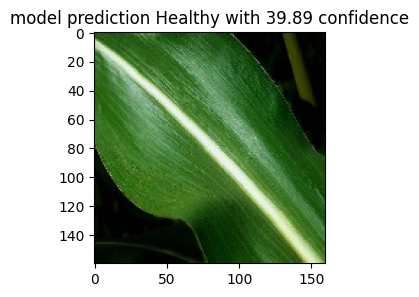

In [57]:
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title(f"model prediction {classes[np.argmax(predict)]} with {predict[0][np.argmax(predict)]*100 :.2f} confidence")


In [46]:
classes

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']